Here is the case study for Lending Club data analysis. 
The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [138]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
lc = pd.read_csv('loan.csv')

C:\Users\venkats\AppData\Local\Temp\ipykernel_11400\3295163602.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lc = pd.read_csv('loan.csv')


In [140]:
lc.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [141]:
loan = lc[(lc.loan_status =='Charged Off') | (lc.loan_status =='Fully Paid')][['id','annual_inc','loan_status','loan_amnt','emp_length','funded_amnt', 'funded_amnt_inv', 'term','issue_d','int_rate','installment', 'grade','sub_grade','dti','delinq_2yrs','home_ownership', 'revol_util', 'purpose','verification_status']]

In [142]:
loan.head()

,id,annual_inc,loan_status,loan_amnt,emp_length,funded_amnt,funded_amnt_inv,term,issue_d,int_rate,installment,grade,sub_grade,dti,delinq_2yrs,home_ownership,revol_util,purpose,verification_status
0,1077501,24000.0,Fully Paid,5000,10+ years,5000,4975.0,36 months,Dec-11,10.65%,162.87,B,B2,27.65,0,RENT,83.70%,credit_card,Verified
1,1077430,30000.0,Charged Off,2500,< 1 year,2500,2500.0,60 months,Dec-11,15.27%,59.83,C,C4,1.00,0,RENT,9.40%,car,Source Verified
2,1077175,12252.0,Fully Paid,2400,10+ years,2400,2400.0,36 months,Dec-11,15.96%,84.33,C,C5,8.72,0,RENT,98.50%,small_business,Not Verified
3,1076863,49200.0,Fully Paid,10000,10+ years,10000,10000.0,36 months,Dec-11,13.49%,339.31,C,C1,20.00,0,RENT,21%,other,Source Verified
5,1075269,36000.0,Fully Paid,5000,3 years,5000,5000.0,36 months,Dec-11,7.90%,156.46,A,A4,11.20,0,RENT,28.30%,wedding,Source Verified


In [143]:
# Check the remaining fields dataframe its Information

loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   38577 non-null  int64  
 1   annual_inc           38577 non-null  float64
 2   loan_status          38577 non-null  object 
 3   loan_amnt            38577 non-null  int64  
 4   emp_length           37544 non-null  object 
 5   funded_amnt          38577 non-null  int64  
 6   funded_amnt_inv      38577 non-null  float64
 7   term                 38577 non-null  object 
 8   issue_d              38577 non-null  object 
 9   int_rate             38577 non-null  object 
 10  installment          38577 non-null  float64
 11  grade                38577 non-null  object 
 12  sub_grade            38577 non-null  object 
 13  dti                  38577 non-null  float64
 14  delinq_2yrs          38577 non-null  int64  
 15  home_ownership       38577 non-null  obje

In [144]:
# find the percentage of nulls in the columns
loan.isnull().sum()/len(lc)*100


id                     0.000000
annual_inc             0.000000
loan_status            0.000000
loan_amnt              0.000000
emp_length             2.600901
funded_amnt            0.000000
funded_amnt_inv        0.000000
term                   0.000000
issue_d                0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
dti                    0.000000
delinq_2yrs            0.000000
home_ownership         0.000000
revol_util             0.125891
purpose                0.000000
verification_status    0.000000
dtype: float64

In [145]:
# Since < 5% of EMp_length was null, impute with maximum occurence values. Here data is filtered with loan_status
loan.loc[(loan.emp_length.isna()), 'emp_length' ] = '10+ years'

In [146]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [147]:
# covery emp_length column to float, year and years are removed and less than 1 is treated as 0 and 10+ as 10
#loan.loc[:, 'emp_length' ] = loan.loc[:,'emp_length' ].replace(' years','').replace(' year','').replace('< 1','0').replace('+','')

loan.loc[:,'emp_length'] = loan.emp_length.str.replace(' years','').str.replace(' year','').str.replace('< 1','0').str.replace('+','')


loan.loc[:, 'emp_length' ] = loan.emp_length.apply(lambda x : float(x))



In [148]:
# convert interest rate field to float

loan.loc[:,'int_rate'] = loan.int_rate.str.replace('%','')

loan['int_rate'] = loan['int_rate'].astype(float)

In [149]:
#convert loan term to int

loan.loc[:,'term' ] = loan.loc[:,'term'].str.replace('months','').astype(int)

In [150]:
#revol_util

#find null count

loan.revol_util.isnull().sum() # 50 rows out of 39K are null. these rows can be ignored

loan = loan[~(loan.revol_util.isnull())]

loan['revol_util'] =loan.revol_util.apply(lambda x : float(x.split('%')[0]))




In [151]:
loan.shape

(38527, 19)

In [152]:
# covert str to datetime

loan['issue_date'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

loan.loc[:,'issue_month'] = loan.issue_date.dt.month
loan.loc[:, 'issue_year'] = loan.issue_date.dt.year

### Data Cleaned up so far, lets look at Visualitzation

#### First check the category variable loan status - Simple bar graph

In [153]:
cat_columns = loan.select_dtypes(include=['object']).columns

num_columns = loan.select_dtypes(include=['float64', 'int64']).columns

print(cat_columns)
print(num_columns)

Index(['loan_status', 'emp_length', 'term', 'issue_d', 'grade', 'sub_grade',
       'home_ownership', 'purpose', 'verification_status'],
      dtype='object')
Index(['id', 'annual_inc', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'dti', 'delinq_2yrs', 'revol_util'],
      dtype='object')


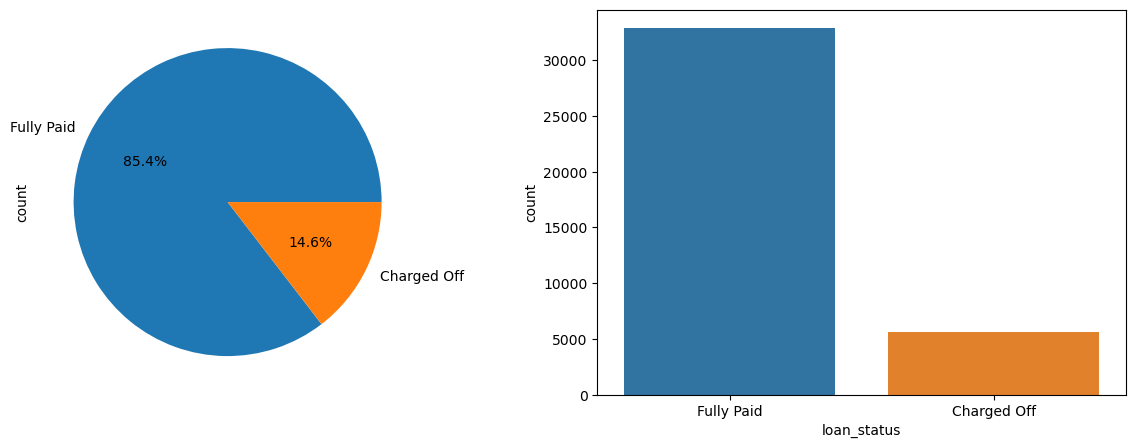

In [154]:
#pie chart & bar chart side by side using subplot of loan status using seaborn different color for each loan status

fx, axes = plt.subplots(1,2, figsize=(15,5))

loan['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0])
sns.countplot(x='loan_status', data=loan, ax=axes[1])
plt.show()



Inference: **Around 86% of the loans are fully paid and 16% are charged off**

In [166]:
#As there are outliers in the annual income, we can remove the outliers and plot the box plot again

#95, 99, 99.5, 99.9 percentile values are calculated to remove the outliers

p95 = loan['annual_inc'].quantile(0.95)
p99 = loan['annual_inc'].quantile(0.99)
p995 = loan['annual_inc'].quantile(0.995)
p999 = loan['annual_inc'].quantile(0.999)

#using formatting specifilters to print the values

print('95th percentile: {:,.2f},  99th percentile: {:,.2f}, max: {:,.2f}'.format(p95, p99, loan['annual_inc'].max()))

95th percentile: 117,000.00,  99th percentile: 135,000.00, max: 140,004.00


### Continious Variable Univariate Analysis ###

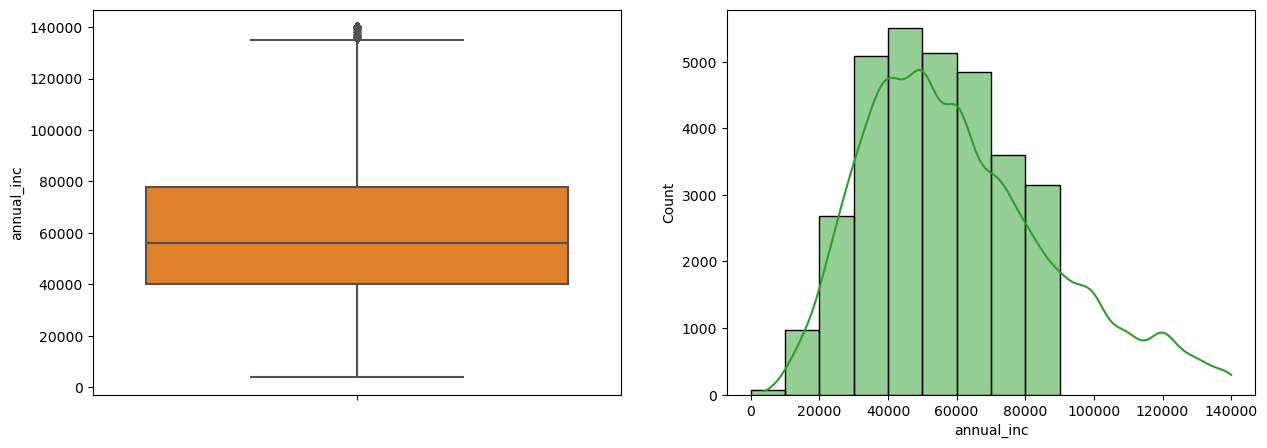

In [168]:
#Analyse lenders annual income distribution. Box Plot and bins of 10K using subplots

fx, axes = plt.subplots(1,2, figsize=(15,5))
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

sns.boxplot(y='annual_inc', data=loan, color =colors[1],ax=axes[0])
sns.histplot(loan['annual_inc'], bins=range(0, 100000, 10000), color =colors[2], kde=True, ax=axes[1])
plt.show()


#As there are outliers in the annual income, we can remove the outliers and plot the box plot again

#95, 99, 99.5, 99.9 percentile values are calculated to remove the outliers

p95 = loan['annual_inc'].quantile(0.95)
p99 = loan['annual_inc'].quantile(0.99)
p995 = loan['annual_inc'].quantile(0.995)
p999 = loan['annual_inc'].quantile(0.999)

#using formatting specifilters to print the values

print('95th percentile: {:,.2f},  99th percentile: {:,.2f}, max: {:,.2f}'.format(p95, p99, loan['annual_inc'].max()))

##### Considering only 95th percentile values. Reason is 99th percentile values are very high and it will remove most of the data. Also people with very high income are not the target customers for loan chance of paying back is high.



In [169]:
loan = loan[(loan['annual_inc'] <= p95)]

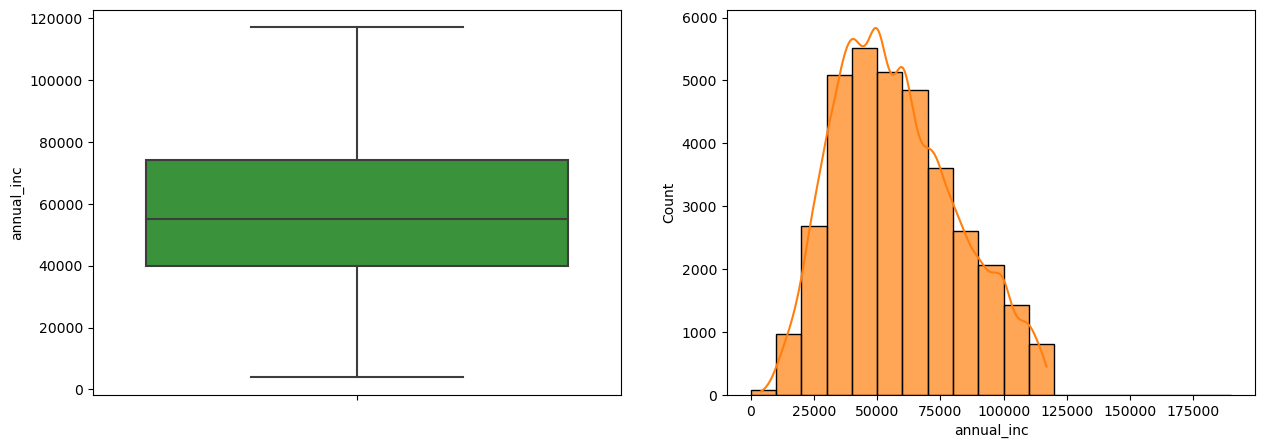

In [170]:
# #Analyse lenders annual income distribution. Box Plot and bins of 10K using subplots

#histplot should have KDE

#diffent colors for histplot and boxplot


colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='annual_inc', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['annual_inc'], bins=range(0, 200000, 10000), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
plt.show()

Inference: **Most of the people who take loan have income range between 40K to 80K**

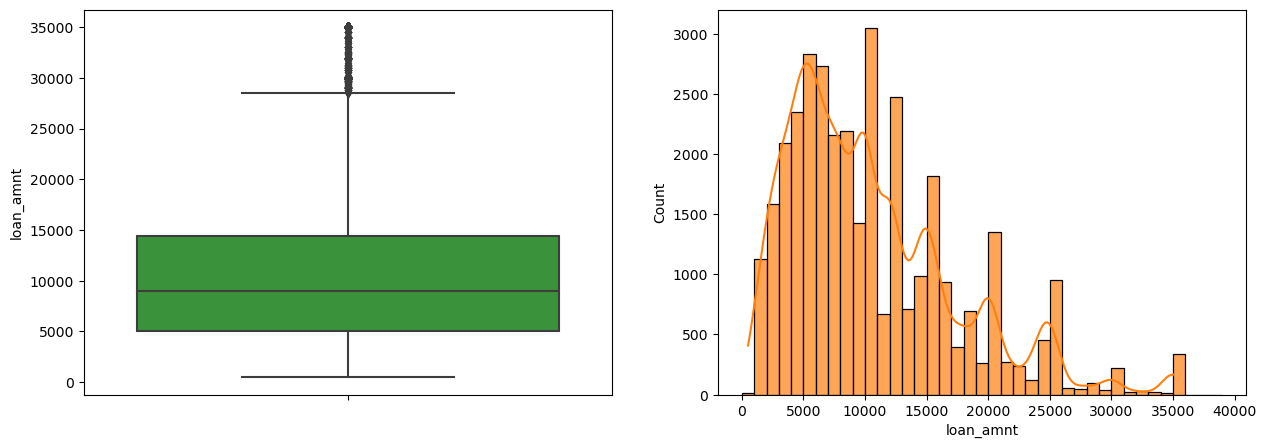

In [171]:
# Analyse the loan amount distribution using box plot and histplot with KDE

fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='loan_amnt', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['loan_amnt'], bins=range(0, 40000, 1000), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
plt.show()

Inference : **Loan amount ranges from 500 to 35000 with most of the loans between 5000 to 15000**


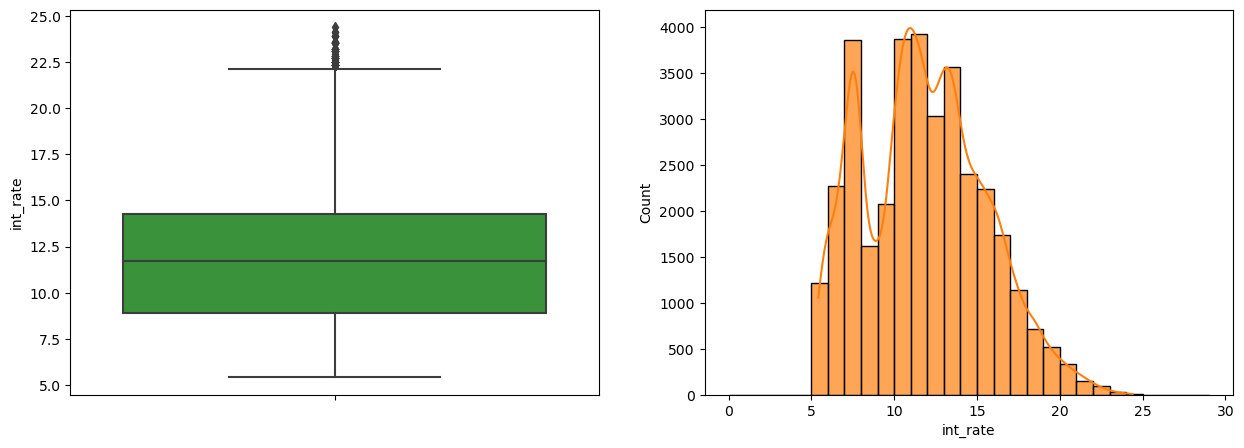

In [178]:
# Analyse the interest rate distribution using box plot and histplot with KDE

fx, axes = plt.subplots(1,2, figsize=(15,5))

sns.boxplot(y='int_rate', data=loan, color=colors[2] ,ax=axes[0])
sns.histplot(loan['int_rate'], bins=range(0, 30, 1), kde=True, color=colors[1], alpha=0.7, ax=axes[1])
plt.show()


Inference: **Interest rate ranges between 10 to 15%**

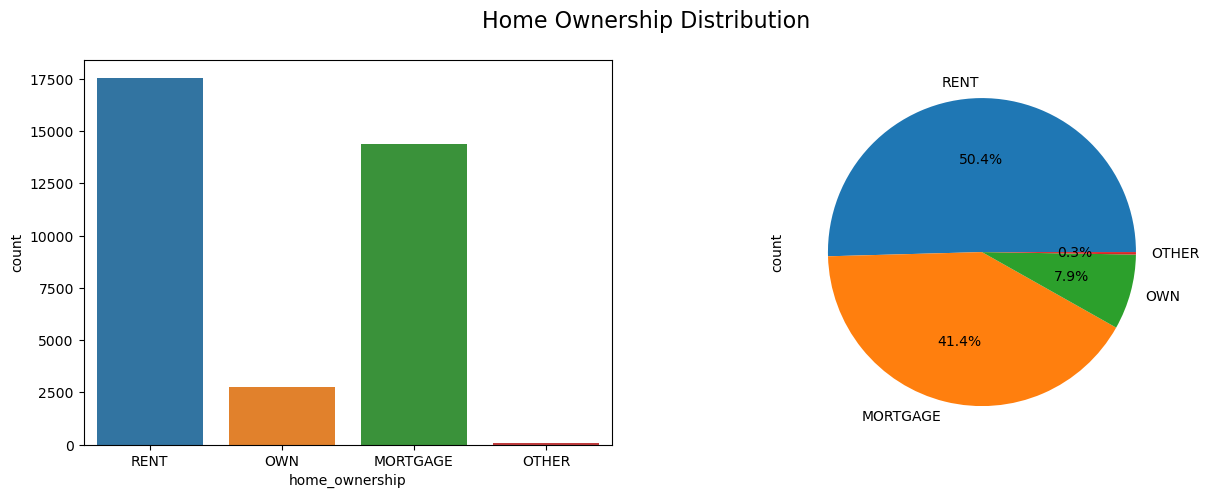

In [172]:
#as home ownership has none.. lets find its count. Only 3 rows have none as home ownership. we can make it as Other. 

loan['home_ownership'].value_counts()
loan.loc[loan['home_ownership'] == 'NONE', 'home_ownership'] = 'OTHER'


# Home ownership distribution using countplot and pie chart using seaborn and subplot

# add common title for both the plots

fx, axes = plt.subplots(1,2, figsize=(15,5))

plt.suptitle('Home Ownership Distribution', fontsize=16)

sns.countplot(x='home_ownership', data=loan, ax=axes[0])
loan['home_ownership'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])

plt.show()


Inference : **Very less people who has own home has taken loan. Most of the people who has taken loan are staying in rented house or mortgaged house.**

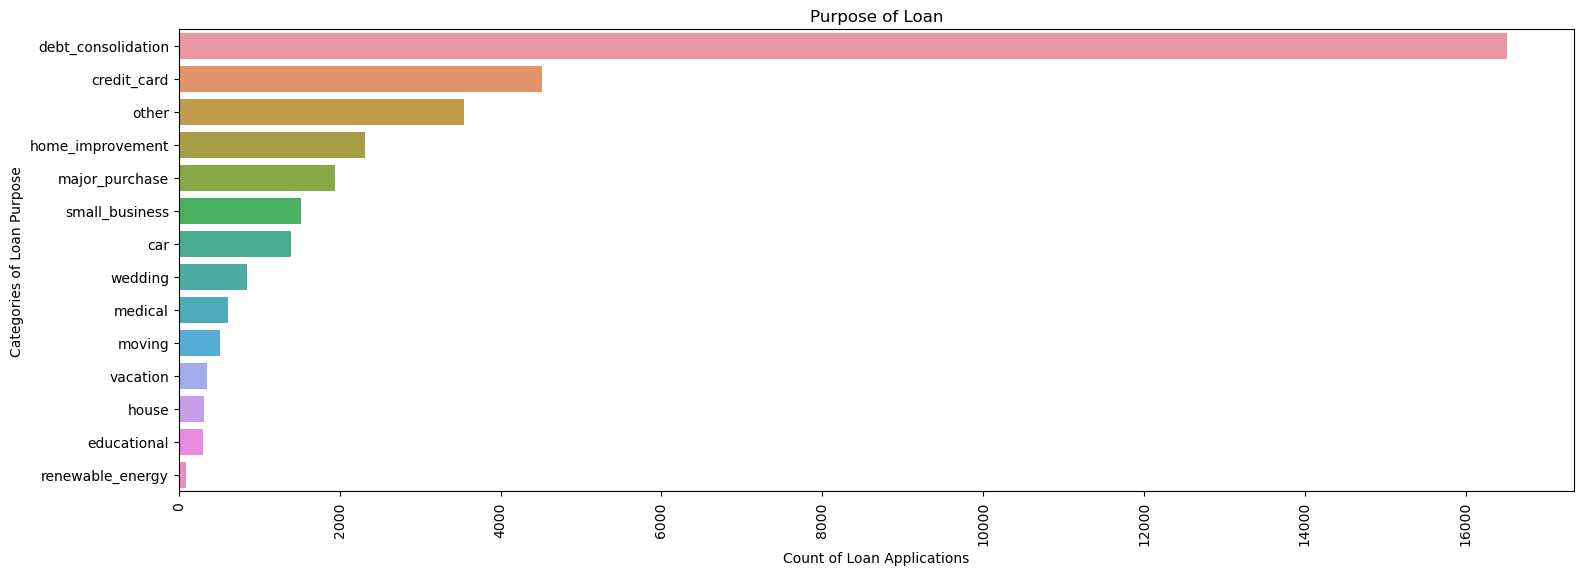

In [192]:
# add common title for both the plots

#horizontal Bar chart for purpose of loan



plt.figure(figsize=(18,6))
sns.countplot(y='purpose', data=loan, order=loan['purpose'].value_counts().index)
plt.xlabel('Count of Loan Applications')
plt.ylabel('Categories of Loan Purpose')
plt.title('Purpose of Loan')

plt.xticks(rotation=90)
plt.show()



Inference: **Debt consolidation is biggest reason for loan**

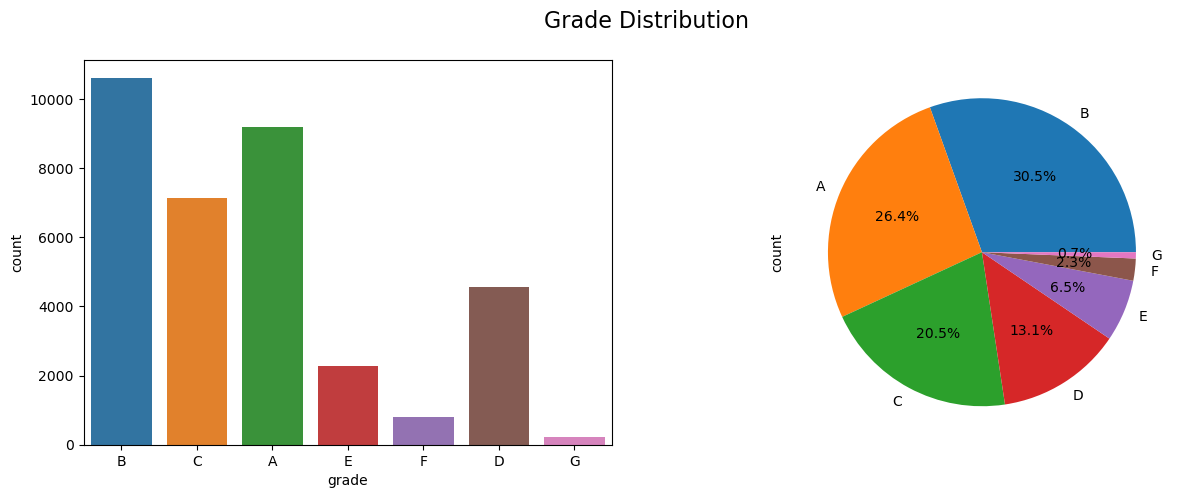

In [194]:
#Analyse grade and subgrade distribution using countplot and pie chart using seaborn and subplot
# add common title for both the plots

#split data by Subgrade and Grade and find the count of each



fig, axes = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Grade Distribution', fontsize=16)
sns.countplot(x='grade', data=loan, ax=axes[0])
loan['grade'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])


plt.show()


#### Analyse Deafulters data. Find possible reasons for defaulting

In [174]:
loan[loan.loan_status == 'Charged Off']

,id,annual_inc,loan_status,loan_amnt,emp_length,funded_amnt,funded_amnt_inv,term,issue_d,int_rate,...,sub_grade,dti,delinq_2yrs,home_ownership,revol_util,purpose,verification_status,issue_date,issue_month,issue_year
1,1077430,30000.0,Charged Off,2500,0.0,2500,2500.0,60,Dec-11,15.27,...,C4,1.00,0,RENT,9.4,car,Source Verified,2011-12-01,12,2011
8,1071795,40000.0,Charged Off,5600,4.0,5600,5600.0,60,Dec-11,21.28,...,F2,5.55,0,OWN,32.6,small_business,Source Verified,2011-12-01,12,2011
9,1071570,15000.0,Charged Off,5375,0.0,5375,5350.0,60,Dec-11,12.69,...,B5,18.08,0,RENT,36.5,other,Verified,2011-12-01,12,2011
12,1064687,30000.0,Charged Off,9000,0.0,9000,9000.0,36,Dec-11,13.49,...,C1,10.08,0,RENT,91.7,debt_consolidation,Source Verified,2011-12-01,12,2011
14,1069057,100000.0,Charged Off,10000,3.0,10000,10000.0,36,Dec-11,10.65,...,B2,7.06,0,RENT,55.5,other,Source Verified,2011-12-01,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39653,123228,96000.0,Charged Off,20000,0.0,20000,975.0,36,Sep-07,9.64,...,B4,2.86,0,RENT,42.5,small_business,Not Verified,2007-09-01,9,2007
39666,119043,40000.0,Charged Off,15450,2.0,15450,600.0,36,Aug-07,11.22,...,C4,13.50,0,MORTGAGE,34.3,debt_consolidation,Not Verified,2007-08-01,8,2007
39667,118823,32000.0,Charged Off,2500,0.0,2500,675.0,36,Aug-07,12.80,...,D4,20.00,0,MORTGAGE,35.1,home_improvement,Not Verified,2007-08-01,8,2007
39668,118533,75000.0,Charged Off,2500,0.0,2500,825.0,36,Aug-07,9.64,...,B4,20.00,0,MORTGAGE,3.8,home_improvement,Not Verified,2007-08-01,8,2007


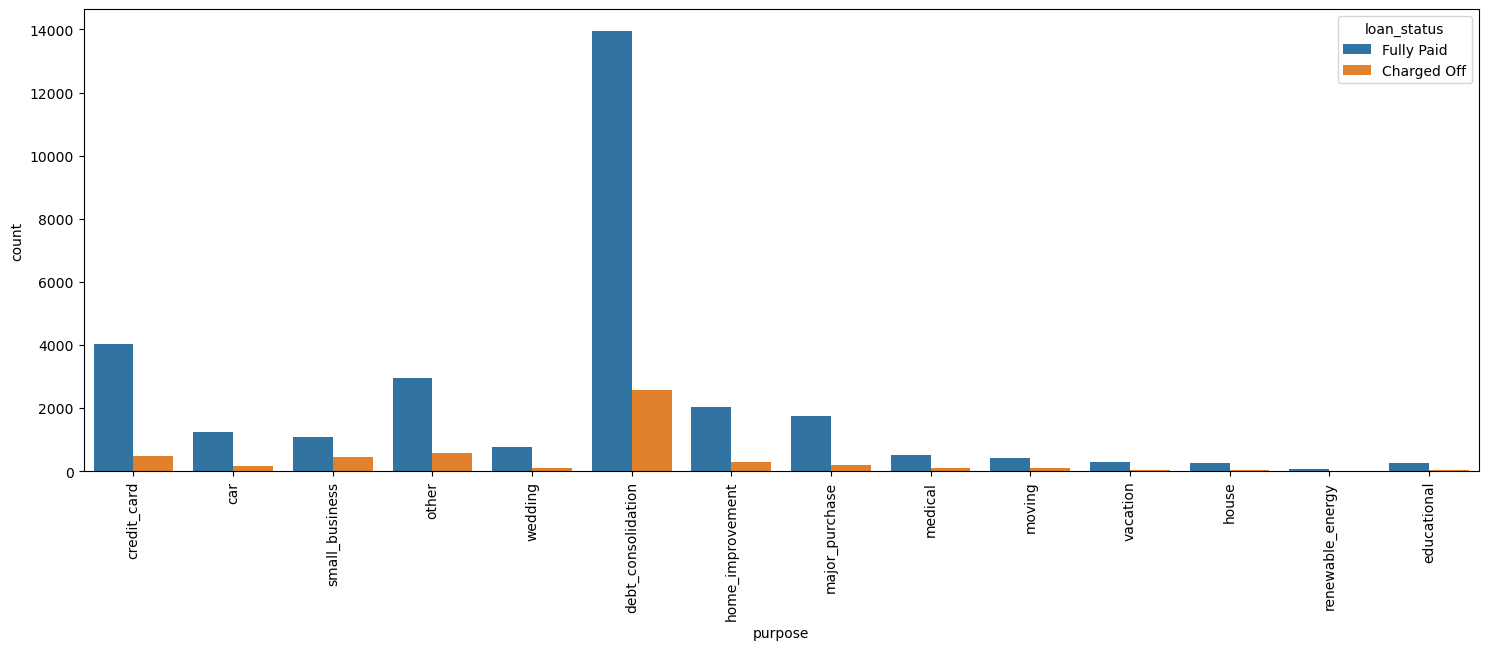

In [175]:
#Split by Purpose

plt.figure(figsize=(18,6))
sns.countplot(x='purpose', data=loan, hue='loan_status')
plt.xticks(rotation=90)
plt.show()



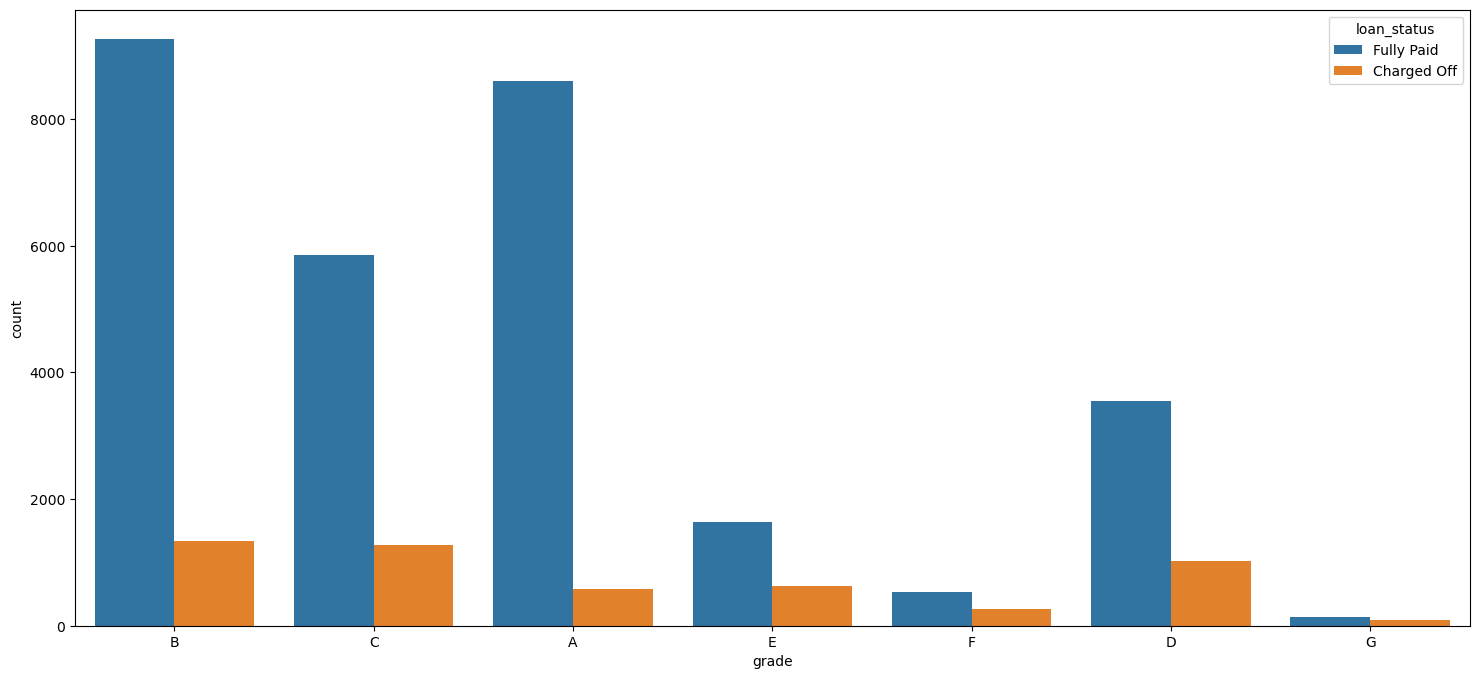

In [176]:
# Split by Grade and Subgrade

plt.figure(figsize=(18,8))
sns.countplot(x='grade', data=loan, hue='loan_status')
plt.show()


In [177]:
loan.columns

Index(['id', 'annual_inc', 'loan_status', 'loan_amnt', 'emp_length',
       'funded_amnt', 'funded_amnt_inv', 'term', 'issue_d', 'int_rate',
       'installment', 'grade', 'sub_grade', 'dti', 'delinq_2yrs',
       'home_ownership', 'revol_util', 'purpose', 'verification_status',
       'issue_date', 'issue_month', 'issue_year'],
      dtype='object')

Text(0.5, 1.0, 'Interest Rate vs Loan Amount')

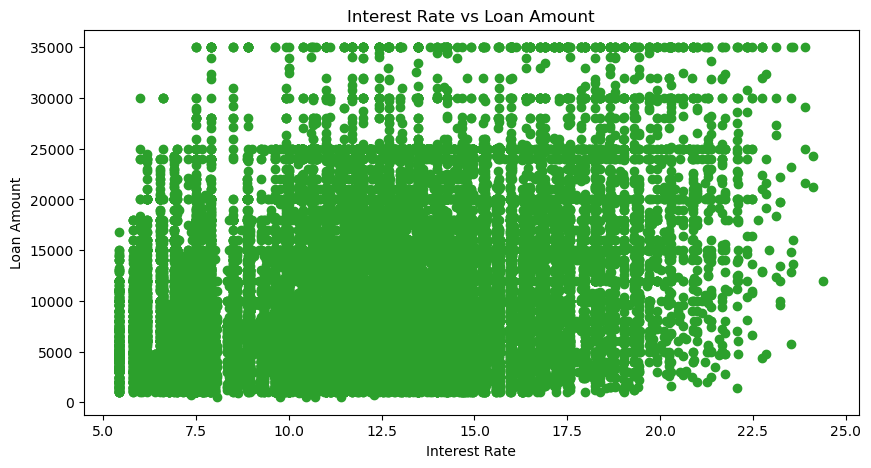

In [ ]:
# Analyse Interest rate distribution and loan amount distribution using scatter plot

# find the correlation between interest rate and loan amount and plot

loan[['int_rate', 'loan_amnt']].corr()


plt.figure(figsize=(10,5))
plt.scatter(loan['int_rate'], loan['loan_amnt'], color=colors[2])
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.title('Interest Rate vs Loan Amount')
